In [65]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, norm, expon, kstest, probplot
from scipy import special

Slope of log(σ/N) vs log(N): -0.480 (Expected: -0.5)

Chi-squared test for N=1000000:
  p-value = 0.7074
  Conclusion: Uniform


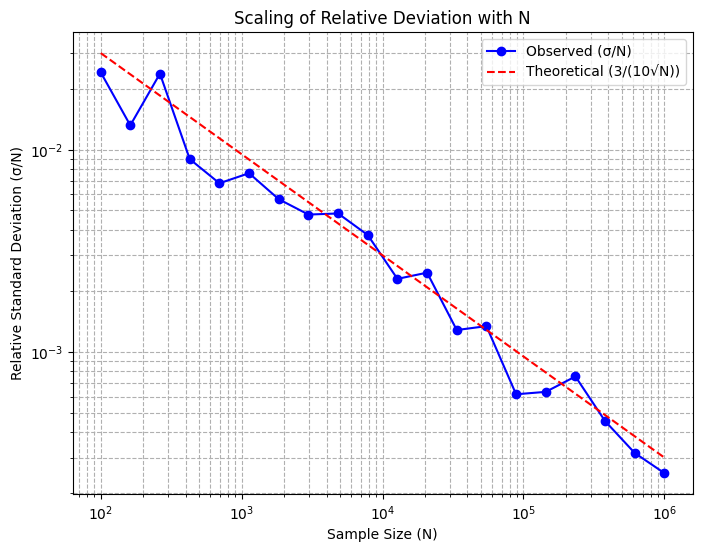

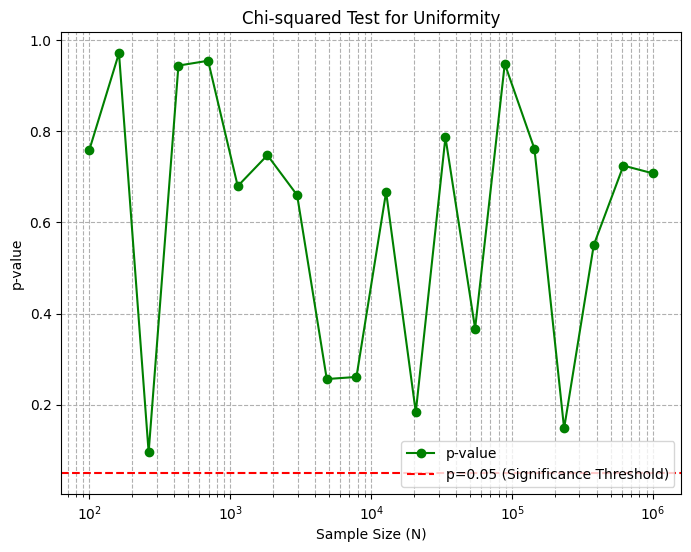

In [ ]:
N_values = np.logspace(2, 6, num=20, dtype=int)

relative_deviations = []
p_values = []

for N in N_values:
    counts = np.zeros(10)
    for _ in range(N):
        num = random.randint(0, 9)
        counts[num] += 1
    
    sigma = np.std(counts)
    relative_deviation = sigma / N
    relative_deviations.append(relative_deviation)
    
    expected = N / 10
    chi2_stat, p_value = chisquare(counts, f_exp=np.full(10, expected))
    p_values.append(p_value)

plt.figure(figsize=(8, 6))
plt.loglog(N_values, relative_deviations, 'bo-', label='Observed (σ/N)')
plt.loglog(N_values, (3/10) / np.sqrt(N_values), 'r--', label='Theoretical (3/(10√N))')
plt.xlabel('Sample Size (N)')
plt.ylabel('Relative Standard Deviation (σ/N)')
plt.title('Scaling of Relative Deviation with N')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig('relative_deviation_scaling.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.semilogx(N_values, p_values, 'go-', label='p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='p=0.05 (Significance Threshold)')
plt.xlabel('Sample Size (N)')
plt.ylabel('p-value')
plt.title('Chi-squared Test for Uniformity')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig('uniformity_p_values.png', dpi=300, bbox_inches='tight')

log_N = np.log10(N_values)
log_dev = np.log10(relative_deviations)
slope, _ = np.polyfit(log_N, log_dev, 1)
print(f"Slope of log(σ/N) vs log(N): {slope:.3f} (Expected: -0.5)")

print(f"\nChi-squared test for N={N_values[-1]}:")
print(f"  p-value = {p_values[-1]:.4f}")
print("  Conclusion:", "Uniform" if p_values[-1] > 0.05 else "Non-uniform")

In [ ]:
N = 100000
rng = np.random.default_rng()
numbers = rng.integers(0, 10, size=N)

following_4 = []
for i in range(1, len(numbers)):
    if numbers[i-1] == 4:
        following_4.append(numbers[i])

counts = np.zeros(10)
for num in following_4:
    counts[num] += 1

expected = np.ones(10) * len(following_4) / 10

chi2, pvalue = chisquare(counts)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(10), counts, color='green', alpha=0.7, label='Observed Frequency')
plt.axhline(y=len(following_4)/10, color='r', linestyle='--', label='Expected Frequency')
plt.xlabel('Digit')
plt.ylabel('Frequency')

plt.title(r'Distribution of Digits Following 4 (N=%d)' % len(following_4) + '\n' +
          r'p-value = %.4f | Expected $\sigma$ = %.1f' % (pvalue, np.sqrt(len(following_4)*0.09)))
plt.grid(True, alpha=0.3)
plt.legend()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.savefig('digits_following_4.png', dpi=300, bbox_inches='tight')
plt.close()

print(f"Total numbers following 4: {len(following_4)}")
print(f"Expected uniform frequency: {len(following_4)/10:.1f}")
print(f"Observed standard deviation: {np.std(counts):.1f}")
print(f"Theoretical standard deviation: {np.sqrt(len(following_4)*0.09):.1f}")
print(f"Chi-square test statistic: {chi2:.2f}")
print(f"Chi-square test p-value: {pvalue:.4f}")

print("\nTheoretical Expectation:")
print("1. For perfectly uniform distribution, each digit (0-9) should follow '4' with probability 1/10.")
print(f"2. With {len(following_4)} occurrences of '4', we expect {len(following_4)/10:.1f} counts per digit.")
print("3. The standard deviation of counts should be sqrt(N*p*(1-p)) = sqrt(N*0.1*0.9) ≈ sqrt(N*0.09)")
print("4. p-value > 0.05 suggests no evidence against uniformity.")

Total numbers following 4: 10016
Expected uniform frequency: 1001.6
Observed standard deviation: 25.5
Theoretical standard deviation: 30.0
Chi-square test statistic: 6.50
Chi-square test p-value: 0.6886

Theoretical Expectation:
1. For perfectly uniform distribution, each digit (0-9) should follow '4' with probability 1/10.
2. With 10016 occurrences of '4', we expect 1001.6 counts per digit.
3. The standard deviation of counts should be sqrt(N*p*(1-p)) = sqrt(N*0.1*0.9) ≈ sqrt(N*0.09)
4. p-value > 0.05 suggests no evidence against uniformity.



=== LCG Statistical Analysis ===
Total numbers generated: 10000
Standard deviation of relative deviation: 0.003520
Theoretical standard deviation (3/10√N): 0.003000
Ratio observed/theoretical: 1.1732
Chi-square test p-value: 0.1923

=== Numbers Following 4 ===
Total numbers following 4: 1056
Chi-square test p-value: 0.6340
Even numbers after 4: 554 (52.5%)
Odd numbers after 4: 502 (47.5%)

Most common transitions:
3→8: 128 times
0→5: 122 times
1→4: 122 times
5→5: 121 times
6→3: 120 times


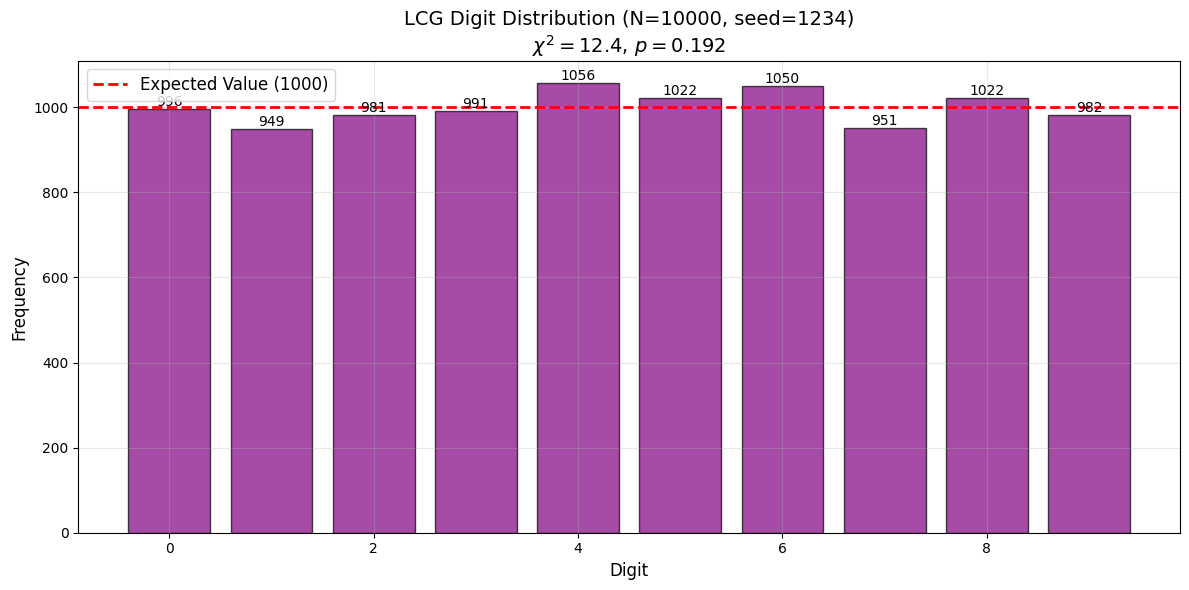

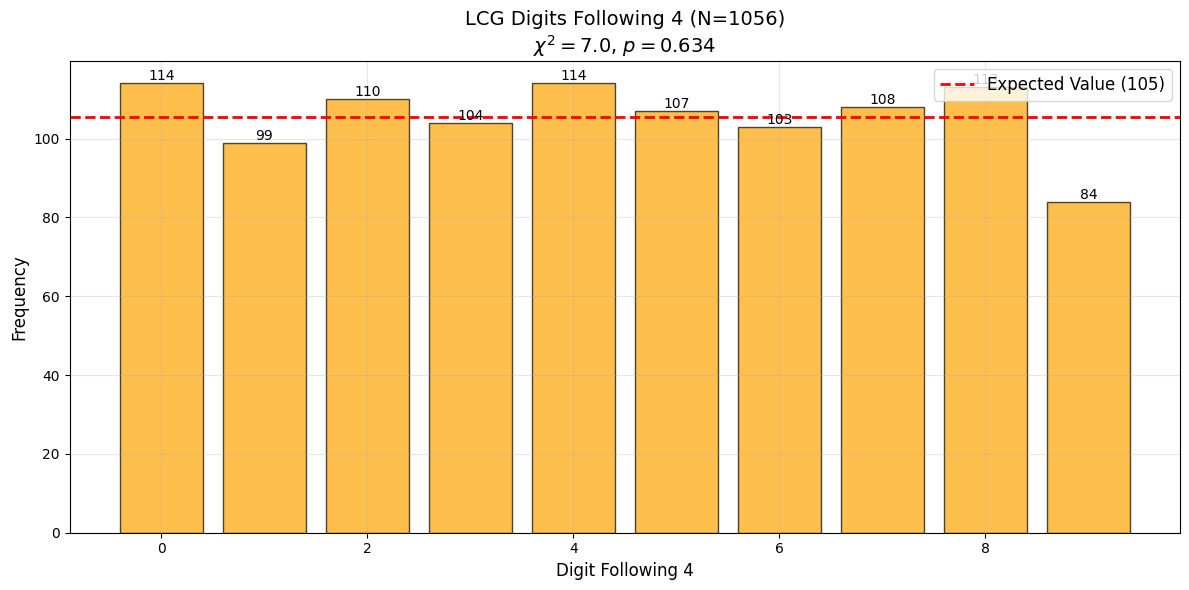

In [ ]:
class LCG:
    def __init__(self, seed=None):
        self.a = 1664525
        self.c = 1013904223
        self.m = 2**31
        
        if seed is None:
            import time
            self.seed = int(time.time()) % self.m
        else:
            self.seed = seed % self.m
        
        self.current = self.seed
    
    def next(self):
        self.current = (self.a * self.current + self.c) % self.m
        return self.current
    
    def random_int(self, min_val, max_val):
        rand = self.next() / self.m
        return min_val + int(rand * (max_val - min_val))
    
    def integers(self, min_val, max_val, size):
        return [self.random_int(min_val, max_val) for _ in range(size)]

N = 10000
seed = 1234

lcg = LCG(seed)
numbers = lcg.integers(0, 10, N)

counts = np.zeros(10)
for num in numbers:
    counts[num] += 1

expected = np.ones(10) * N / 10
deviation = counts - expected
relative_deviation = deviation / N
std_dev = np.std(relative_deviation)
theoretical_std = np.sqrt(0.09 / N)

chi2, pvalue = chisquare(counts)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(10), counts, color='purple', alpha=0.7, 
               edgecolor='black', linewidth=1)
plt.axhline(y=N/10, color='r', linestyle='--', linewidth=2, 
            label=f'Expected Value ({N//10})')
plt.xlabel('Digit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(r'LCG Digit Distribution (N=%d, seed=%d)' % (N, seed) + '\n' +
          r'$\chi^2=%.1f$, $p=%.3f$' % (chi2, pvalue), fontsize=14)
plt.grid(True, alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('lcg_digit_distribution.png', dpi=300, bbox_inches='tight')

following_4 = []
for i in range(1, len(numbers)):
    if numbers[i-1] == 4:
        following_4.append(numbers[i])

counts_follow4 = np.zeros(10)
for num in following_4:
    counts_follow4[num] += 1

expected_follow4 = np.ones(10) * len(following_4) / 10
chi2_follow4, pvalue_follow4 = chisquare(counts_follow4)

plt.figure(figsize=(12, 6))
bars_f4 = plt.bar(range(10), counts_follow4, color='orange', alpha=0.7,
                  edgecolor='black', linewidth=1)
plt.axhline(y=len(following_4)/10, color='r', linestyle='--', linewidth=2,
            label=f'Expected Value ({len(following_4)//10})')
plt.xlabel('Digit Following 4', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(r'LCG Digits Following 4 (N=%d)' % len(following_4) + '\n' +
          r'$\chi^2=%.1f$, $p=%.3f$' % (chi2_follow4, pvalue_follow4), fontsize=14)
plt.grid(True, alpha=0.3)

for bar in bars_f4:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('lcg_following_4_distribution.png', dpi=300, bbox_inches='tight')

even_count = sum(1 for num in following_4 if num % 2 == 0)
odd_count = len(following_4) - even_count
even_ratio = even_count/len(following_4)
odd_ratio = odd_count/len(following_4)

print("\n=== LCG Statistical Analysis ===")
print(f"Total numbers generated: {N}")
print(f"Standard deviation of relative deviation: {std_dev:.6f}")
print(f"Theoretical standard deviation (3/10√N): {theoretical_std:.6f}")
print(f"Ratio observed/theoretical: {std_dev/theoretical_std:.4f}")
print(f"Chi-square test p-value: {pvalue:.4f}")

print("\n=== Numbers Following 4 ===")
print(f"Total numbers following 4: {len(following_4)}")
print(f"Chi-square test p-value: {pvalue_follow4:.4f}")
print(f"Even numbers after 4: {even_count} ({even_ratio*100:.1f}%)")
print(f"Odd numbers after 4: {odd_count} ({odd_ratio*100:.1f}%)")

from collections import defaultdict
transition_counts = defaultdict(int)
for i in range(1, len(numbers)):
    transition_counts[(numbers[i-1], numbers[i])] += 1

print("\nMost common transitions:")
sorted_transitions = sorted(transition_counts.items(), key=lambda x: -x[1])
for (a,b), count in sorted_transitions[:5]:
    print(f"{a}→{b}: {count} times")

results_dict = {
    'parameters': {
        'N': N,
        'seed': seed,
        'a': lcg.a,
        'c': lcg.c,
        'm': lcg.m
    },
    'all_numbers': {
        'counts': counts.tolist(),
        'expected': expected.tolist(),
        'pvalue': pvalue,
        'std_dev': std_dev,
        'theoretical_std': theoretical_std,
        'chi2': chi2
    },
    'following_4': {
        'counts': counts_follow4.tolist(),
        'expected': expected_follow4.tolist(),
        'pvalue': pvalue_follow4,
        'chi2': chi2_follow4,
        'even_ratio': even_ratio,
        'odd_ratio': odd_ratio
    },
    'transitions': dict(transition_counts)
}

=== N = 5 ===
Mean: 2.494340, Theoretical: 2.500000
Standard Deviation: 0.644228, Theoretical: 0.645497
=== N = 10 ===
Mean: 5.004960, Theoretical: 5.000000
Standard Deviation: 0.918473, Theoretical: 0.912871
=== N = 100 ===
Mean: 49.993628, Theoretical: 50.000000
Standard Deviation: 2.927403, Theoretical: 2.886751
=== N = 1000 ===
Mean: 500.085863, Theoretical: 500.000000
Standard Deviation: 9.061480, Theoretical: 9.128709


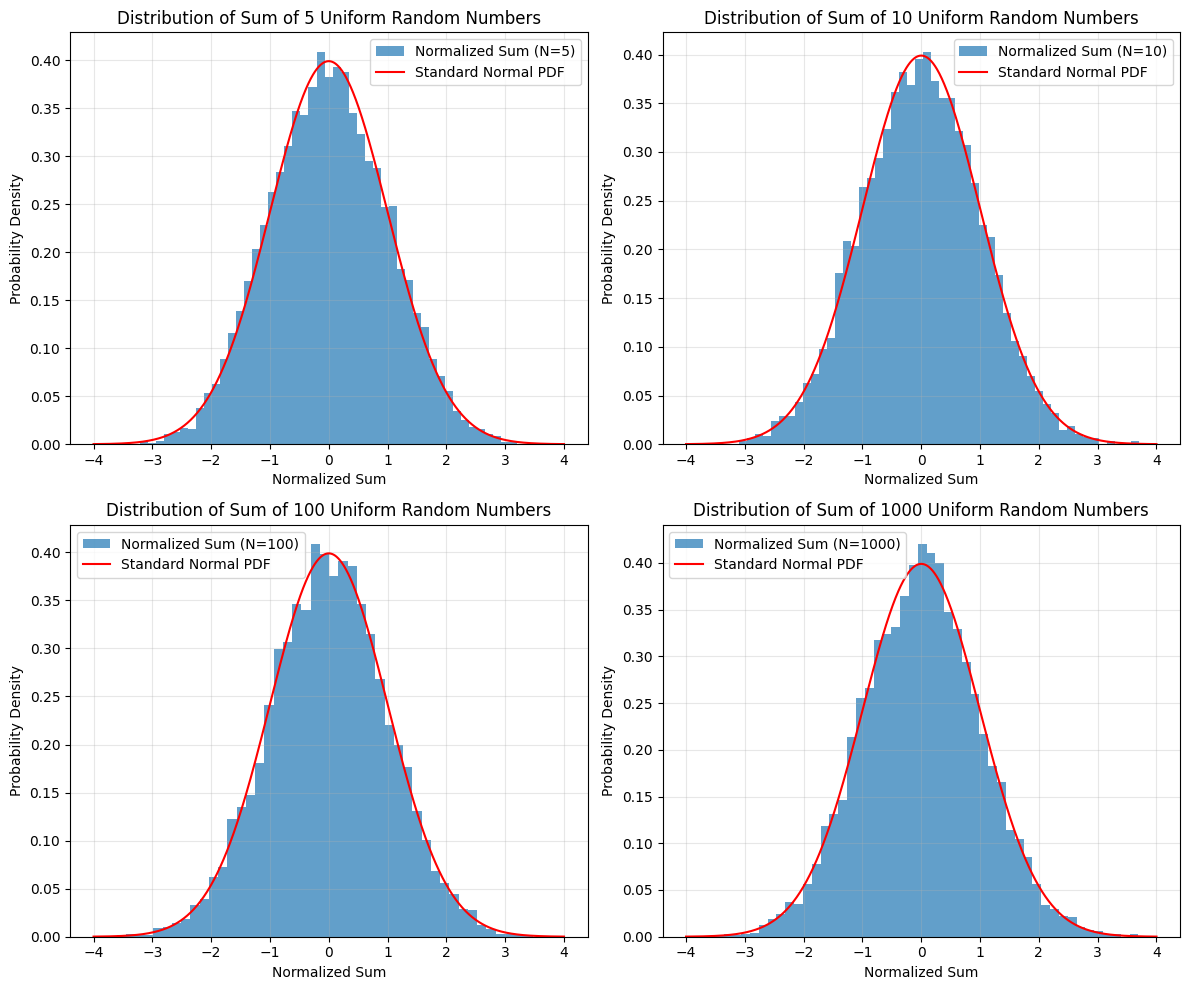

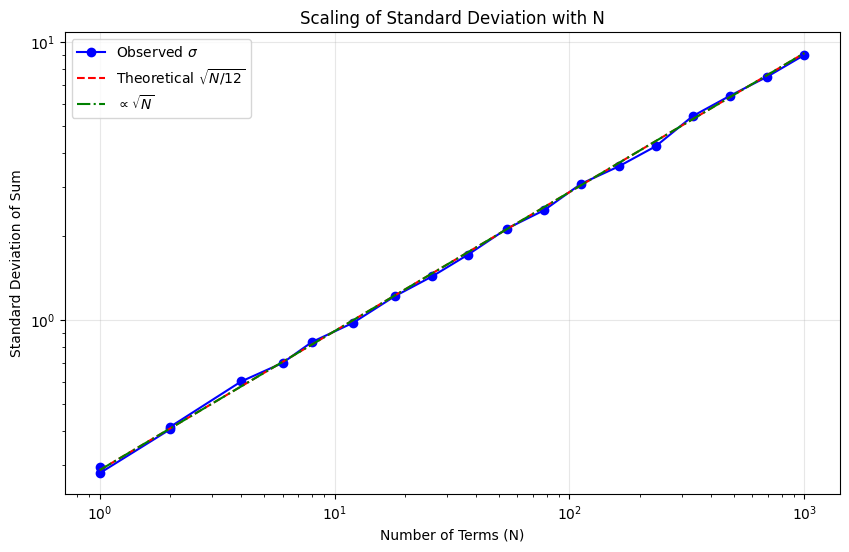

In [ ]:
N_values = [5, 10, 100, 1000]
num_samples = 10000
results = {}

rng = np.random.default_rng()

plt.figure(figsize=(12, 10))

for i, N in enumerate(N_values):
    sums = []
    for _ in range(num_samples):
        random_numbers = rng.random(N)
        sums.append(sum(random_numbers))
    
    sums_array = np.array(sums)
    mean_sum = np.mean(sums_array)
    std_sum = np.std(sums_array)
    normalized_sums = (sums_array - mean_sum) / std_sum
    
    x = np.linspace(-4, 4, 1000)
    normal_pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
    
    results[N] = {
        'sums': sums_array,
        'normalized_sums': normalized_sums,
        'mean': mean_sum,
        'std': std_sum,
        'theoretical_mean': N * 0.5,
        'theoretical_std': np.sqrt(N * (1/12))
    }
    
    plt.subplot(2, 2, i+1)
    plt.hist(normalized_sums, bins=50, density=True, alpha=0.7, 
                label=f'Normalized Sum (N={N})')
    plt.plot(x, normal_pdf, 'r-', label='Standard Normal PDF')
    plt.xlabel('Normalized Sum')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of Sum of {N} Uniform Random Numbers')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    print(f"=== N = {N} ===")
    print(f"Mean: {mean_sum:.6f}, Theoretical: {N * 0.5:.6f}")
    print(f"Standard Deviation: {std_sum:.6f}, Theoretical: {np.sqrt(N * (1/12)):.6f}")
    
plt.tight_layout()
plt.savefig('problem4_distributions.png', dpi=300, bbox_inches='tight')

sample_sizes = np.logspace(0, 3, 20, dtype=int)
std_devs = []
theoretical_stds = []

for size in sample_sizes:
    sample_sums = []
    for _ in range(1000):
        random_numbers = rng.random(size)
        sample_sums.append(sum(random_numbers))
    
    std_devs.append(np.std(sample_sums))
    theoretical_stds.append(np.sqrt(size * (1/12)))

plt.figure(figsize=(10, 6))
plt.loglog(sample_sizes, std_devs, 'bo-', label=r'Observed $\sigma$')
plt.loglog(sample_sizes, theoretical_stds, 'r--', label=r'Theoretical $\sqrt{N/12}$')
plt.loglog(sample_sizes, np.sqrt(sample_sizes) * theoretical_stds[0] / np.sqrt(sample_sizes[0]), 
           'g-.', label=r'$\propto \sqrt{N}$')

plt.xlabel('Number of Terms (N)')
plt.ylabel('Standard Deviation of Sum')
plt.title('Scaling of Standard Deviation with N')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('problem4_scaling.png', dpi=300, bbox_inches='tight')


=== Exponential Distribution Generated Using Transformation Method ===
Number of samples: 10000
Mean: 2.012340 (Expected: 2.000000)
Standard Deviation: 1.994248 (Expected: 2.000000)

=== Power Law Distribution (n=3) Generated Using Transformation Method ===
Number of samples: 10000
Mean: 0.798719 (Expected: 0.800000)
Standard Deviation: 0.163174 (Expected: 0.163299)

=== Triangular Distribution (mode=0.7) Generated Using Transformation Method ===
Number of samples: 10000
Mean: 0.564841 (Expected: 0.566667)
Standard Deviation: 0.209349 (Expected: 0.209497)

=== Gaussian Distribution Generated Using Box-Muller Transform ===
Number of samples: 10000
Mean: 0.000737 (Expected: 0.000000)
Standard Deviation: 0.993951 (Expected: 1.000000)
Kolmogorov-Smirnov test p-value: 0.927603

=== Gaussian Distribution Generated Using Polar (Marsaglia) Method ===
Number of samples: 10000
Mean: 0.024224 (Expected: 0.000000)
Standard Deviation: 0.995461 (Expected: 1.000000)
Kolmogorov-Smirnov test p-value: 

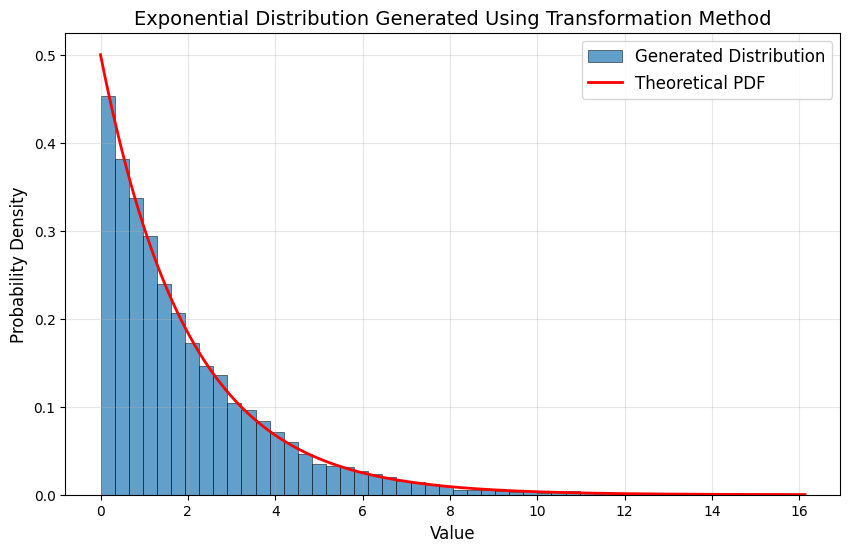

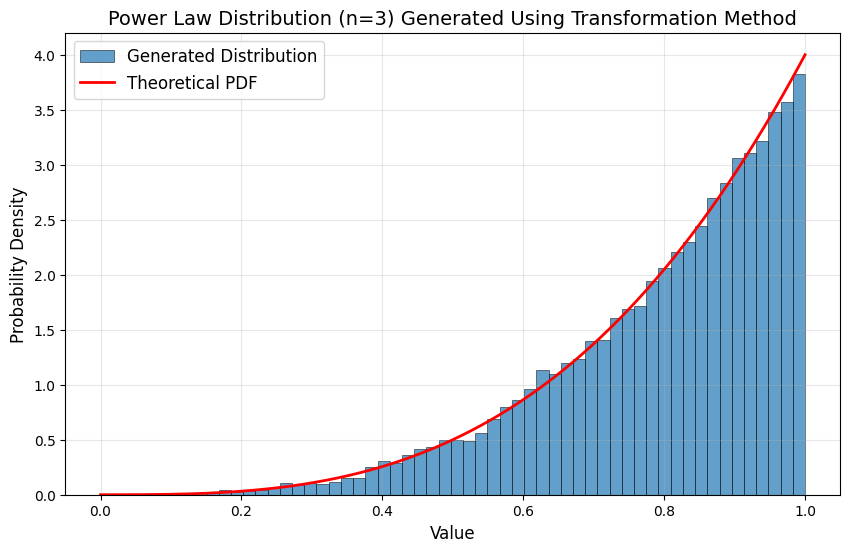

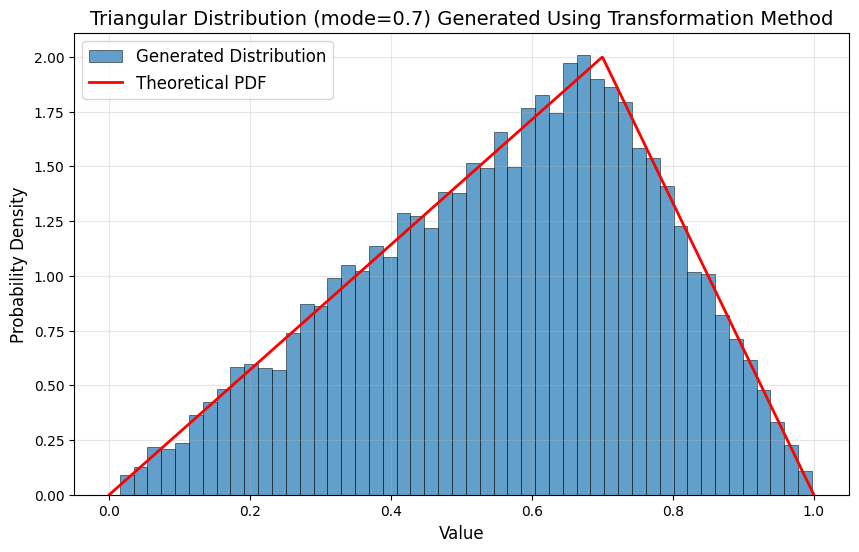

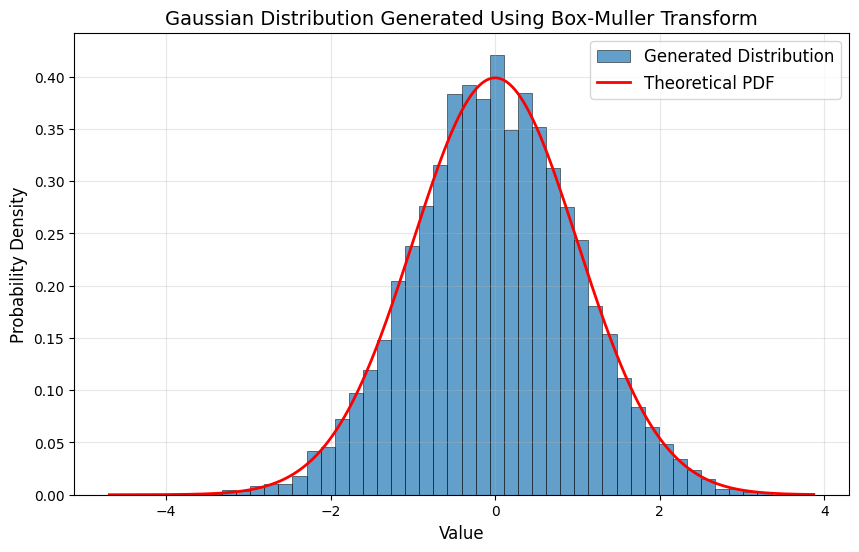

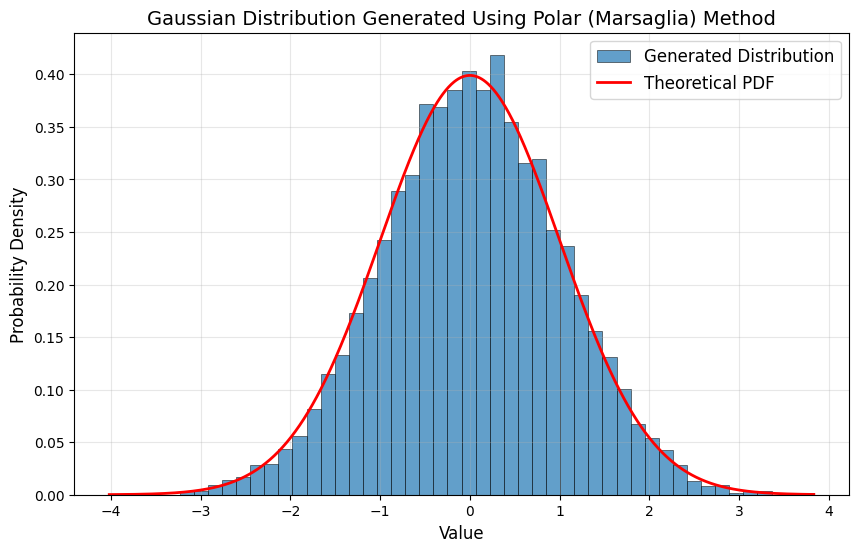

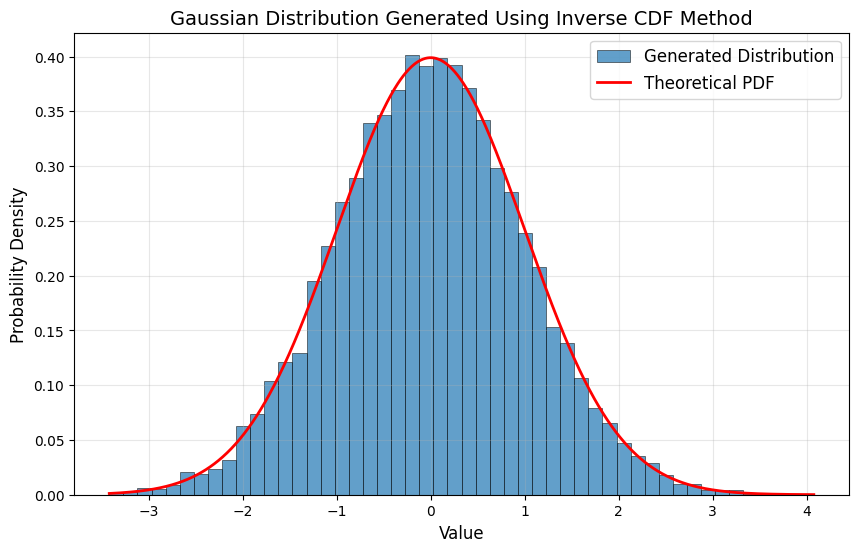

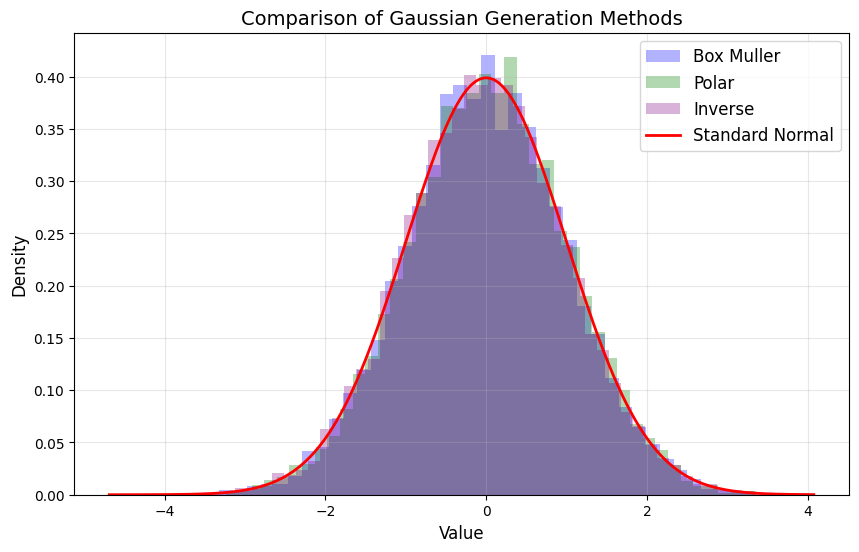

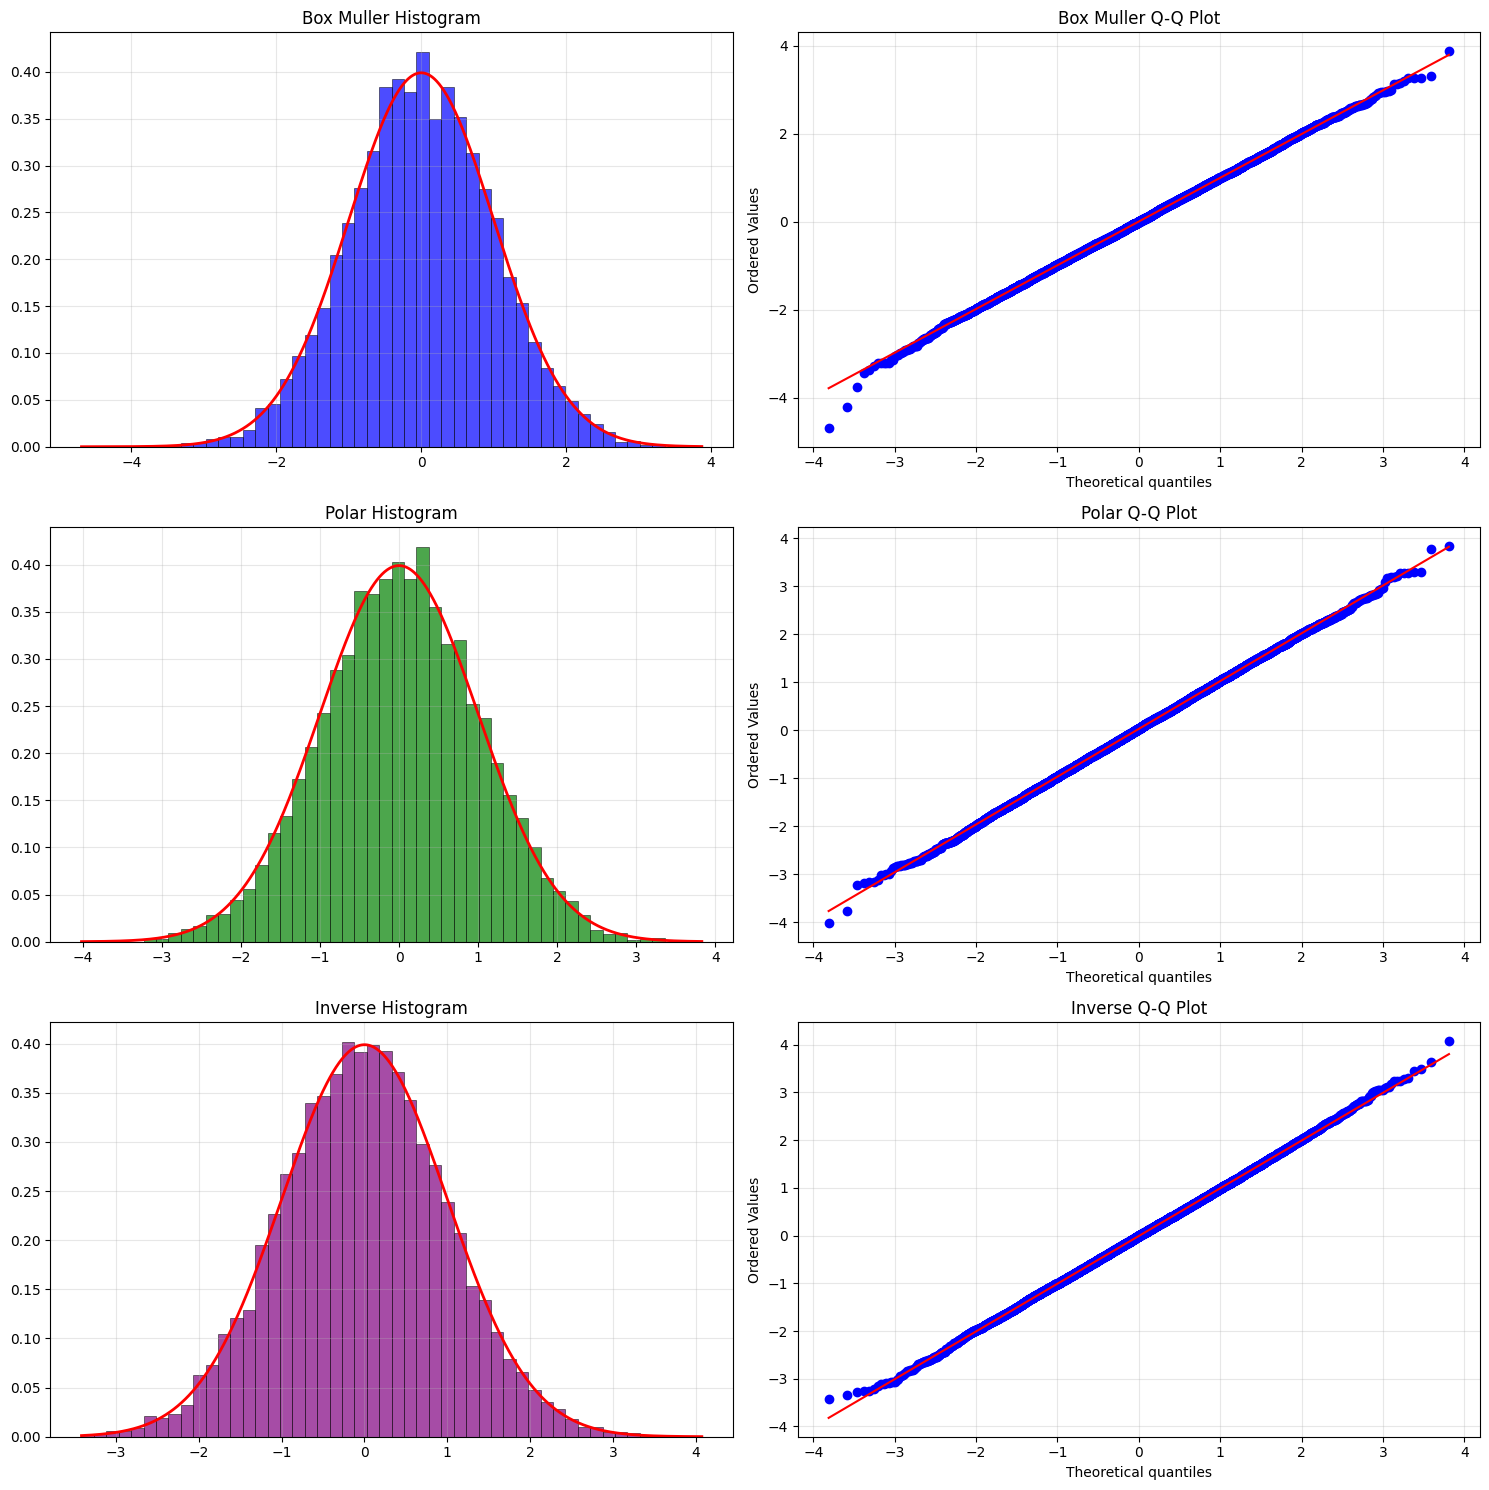

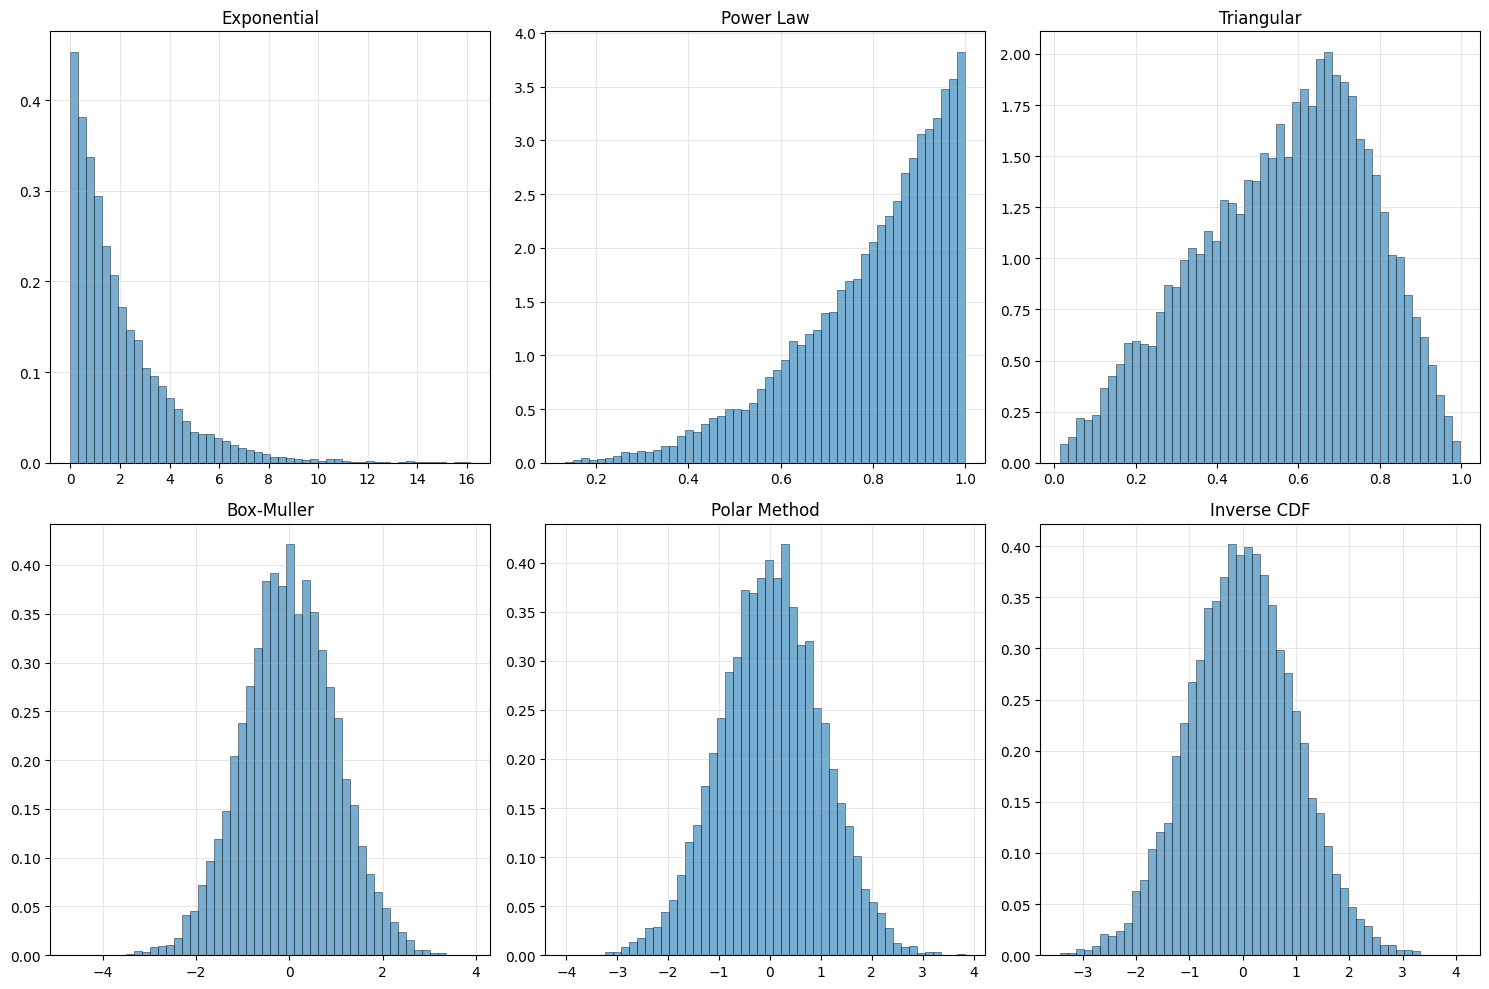

In [ ]:
def generate_distribution(n_samples=10000, dist_type="exponential", **params):
    rng = np.random.default_rng(seed=42)
    u = rng.random(size=n_samples)
    
    if dist_type == "exponential":
        a = params.get('a', 1.0)
        u = np.clip(u, 1e-10, None)
        samples = -a * np.log(u)
        title = 'Exponential Distribution Generated Using Transformation Method'
        pdf = lambda x: expon.pdf(x, scale=a)
        x_range = np.linspace(0, np.max(samples), 1000)
        expected_mean = a
        expected_std = a
        
    elif dist_type == "power":
        n = params.get('n', 2)
        samples = u**(1/(n+1))
        title = f'Power Law Distribution (n={n}) Generated Using Transformation Method'
        pdf = lambda x: (n+1) * x**n
        x_range = np.linspace(0, 1, 1000)
        expected_mean = (n+1)/(n+2)
        expected_std = np.sqrt((n+1)/((n+2)**2 * (n+3)))
        
    elif dist_type == "triangular":
        c = params.get('c', 0.5)
        samples = np.where(u <= c, np.sqrt(u*c), 1 - np.sqrt((1-u)*(1-c)))
        title = f'Triangular Distribution (mode={c}) Generated Using Transformation Method'
        pdf = lambda x: np.where(x <= c, 2*x/c, 2*(1-x)/(1-c))
        x_range = np.linspace(0, 1, 1000)
        expected_mean = (1+c)/3
        expected_std = np.sqrt((1-c+c**2)/18)
        
    elif dist_type == "gaussian":
        method = params.get('method', 'box-muller')
        
        if method == 'box-muller':
            u1 = rng.random(size=n_samples//2)
            u2 = rng.random(size=n_samples//2)
            u1 = np.clip(u1, 1e-10, None)
            r = np.sqrt(-2 * np.log(u1))
            theta = 2 * np.pi * u2
            samples = np.concatenate([r * np.cos(theta), r * np.sin(theta)])[:n_samples]
            title = 'Gaussian Distribution Generated Using Box-Muller Transform'
            
        elif method == 'polar':
            samples = []
            while len(samples) < n_samples:
                u1, u2 = 2*rng.random(2) - 1
                s = u1**2 + u2**2
                if 0 < s < 1:
                    factor = np.sqrt(-2 * np.log(s)/s)
                    samples.extend([u1*factor, u2*factor])
            samples = np.array(samples[:n_samples])
            title = 'Gaussian Distribution Generated Using Polar (Marsaglia) Method'
            
        elif method == 'inverse':
            samples = np.sqrt(2) * special.erfinv(2 * u - 1)
            title = 'Gaussian Distribution Generated Using Inverse CDF Method'
            
        pdf = norm.pdf
        x_range = np.linspace(np.min(samples), np.max(samples), 1000)
        expected_mean = 0
        expected_std = 1
        
    else:
        raise ValueError(f"Unknown distribution type: {dist_type}")
    
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(samples, bins=50, density=True, alpha=0.7, 
                              edgecolor='black', linewidth=0.5, label='Generated Distribution')
    plt.plot(x_range, pdf(x_range), 'r-', linewidth=2, label='Theoretical PDF')
    
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    filename = f"{dist_type}_{params.get('method', '')}_distribution.png".replace(' ', '_')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    mean = np.mean(samples)
    std = np.std(samples)
    print(f"\n=== {title} ===")
    print(f"Number of samples: {n_samples}")
    print(f"Mean: {mean:.6f} (Expected: {expected_mean:.6f})")
    print(f"Standard Deviation: {std:.6f} (Expected: {expected_std:.6f})")
    
    if dist_type == "gaussian":
        ks_stat, p_value = kstest(samples, 'norm')
        print(f"Kolmogorov-Smirnov test p-value: {p_value:.6f}")
    
    return samples

def compare_gaussian_methods(n_samples=10000):
    methods = ['box-muller', 'polar', 'inverse']
    samples = [generate_distribution(n_samples, 'gaussian', method=m) for m in methods]
    colors = ['blue', 'green', 'purple']
    
    plt.figure(figsize=(10, 6))
    for data, color, method in zip(samples, colors, methods):
        plt.hist(data, bins=50, density=True, alpha=0.3,
                color=color, edgecolor='none', 
                label=method.replace('-', ' ').title())
    x = np.linspace(min(np.min(d) for d in samples),
                   max(np.max(d) for d in samples), 1000)
    plt.plot(x, norm.pdf(x), 'r-', linewidth=2, label='Standard Normal')
    plt.title('Comparison of Gaussian Generation Methods', fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.savefig('gaussian_methods_overlay.png', dpi=300, bbox_inches='tight')
    
    plt.figure(figsize=(15, 15))
    
    for i in range(3):
        plt.subplot(3, 2, 2*i+1)
        counts, bins, _ = plt.hist(samples[i], bins=50, density=True, alpha=0.7,
                                 color=colors[i], edgecolor='black', linewidth=0.5)
        x = np.linspace(np.min(samples[i]), np.max(samples[i]), 1000)
        plt.plot(x, norm.pdf(x), 'r-', linewidth=2)
        plt.title(f'{methods[i].replace("-", " ").title()} Histogram', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        plt.subplot(3, 2, 2*i+2)
        probplot(samples[i], dist="norm", plot=plt)
        plt.title(f'{methods[i].replace("-", " ").title()} Q-Q Plot', fontsize=12)
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('gaussian_methods_comparison.png', dpi=300, bbox_inches='tight')
    
    print("\n=== Gaussian Methods Comparison ===")
    for method, data in zip(methods, samples):
        print(f"{method.replace('-', ' ').title()}: Mean = {np.mean(data):.6f}, StdDev = {np.std(data):.6f}")
    
    return samples

exp_samples = generate_distribution(10000, 'exponential', a=2.0)
power_samples = generate_distribution(10000, 'power', n=3)
tri_samples = generate_distribution(10000, 'triangular', c=0.7)

bm, polar, inv = compare_gaussian_methods(10000)

plt.figure(figsize=(15, 10))
dist_data = [
    ('Exponential', exp_samples),
    ('Power Law', power_samples),
    ('Triangular', tri_samples),
    ('Box-Muller', bm),
    ('Polar Method', polar),
    ('Inverse CDF', inv)
]

for i, (name, data) in enumerate(dist_data, 1):
    plt.subplot(2, 3, i)
    plt.hist(data, bins=50, density=True, alpha=0.6, edgecolor='black', linewidth=0.5)
    plt.title(name, fontsize=12)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('all_distributions.png', dpi=300, bbox_inches='tight')